## 1 Objetivo.
  

 - Por meio da análise exploratória dos dados, gerar insights  sobre o negócio em questão.

 - Importando as bibliotecas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

 - Importandos os dados do Studio.

In [2]:
url='https://raw.githubusercontent.com/robertferro/previsao_faturamento_studio_estetica/main/1%20-%20Coleta%20e%20tratamento%20dos%20dados/dados_modelagem.csv'

In [3]:
dados=pd.read_csv(url,sep=',')

In [4]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,...,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
0,2018-12-22,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,270.0,23,2018,12,sabado
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24,2018,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25,2018,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,560.0,26,2018,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,90.0,27,2018,12,quinta


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        740 non-null    object 
 1   design_de_sobrancelhas  740 non-null    float64
 2   design_coloracao        740 non-null    float64
 3   design_coloracao_buco   740 non-null    float64
 4   buco                    740 non-null    float64
 5   brown_lamination        740 non-null    float64
 6   micropigmentacao        740 non-null    float64
 7   extensao_de_cilios      740 non-null    float64
 8   lash_lifting            740 non-null    float64
 9   limpeza_de_pele         740 non-null    float64
 10  microagulhamento        740 non-null    float64
 11  peeling_quimico         740 non-null    float64
 12  massagem_relaxante      740 non-null    float64
 13  pacote_massagem_5       740 non-null    float64
 14  drenagem_linfatica      740 non-null    fl

In [6]:
dados['data_atendimento'] = pd.to_datetime(dados['data_atendimento'])

## 2. EDA

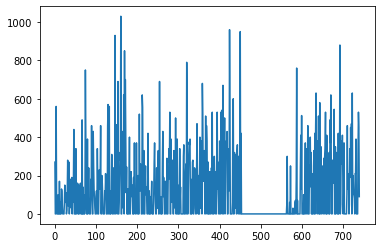

In [7]:
dados.faturamento.plot()

- Como pode ser observado acima existe um período de mais o menos 3 meses com faturamento igual a zero.


- Esse período corresponde ao tempo fechado por conta da pandemia.


- Vou excluir esses registros visto que o negócio só pode funcionar presencialmente e esses dias com faturamento zero vão alterar as visualizações e a análise, podendo trazer conclusões errôeneas sobre o negócio.

## Analisando os dados referentes ao período pós  pandemia.

In [8]:
df = dados[dados['data_atendimento'] >= "2020-07-01"]

In [9]:
df = df.set_index('data_atendimento')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2020-07-01 to 2020-12-31
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   design_de_sobrancelhas  184 non-null    float64
 1   design_coloracao        184 non-null    float64
 2   design_coloracao_buco   184 non-null    float64
 3   buco                    184 non-null    float64
 4   brown_lamination        184 non-null    float64
 5   micropigmentacao        184 non-null    float64
 6   extensao_de_cilios      184 non-null    float64
 7   lash_lifting            184 non-null    float64
 8   limpeza_de_pele         184 non-null    float64
 9   microagulhamento        184 non-null    float64
 10  peeling_quimico         184 non-null    float64
 11  massagem_relaxante      184 non-null    float64
 12  pacote_massagem_5       184 non-null    float64
 13  drenagem_linfatica      184 non-null    float64
 14  striort                

# Análise por dia da semana.

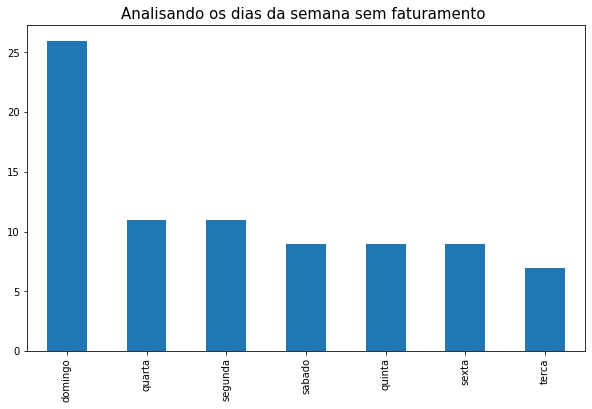

In [11]:
# Contabilizando os dias de negócioque tiveram faturamento zero.

df[df['qtde_clientes']==0].dia_da_semana.value_counts().plot(kind='bar',figsize=(10,6))
plt.title('Analisando os dias da semana sem faturamento ', fontsize=15)
plt.show()


Pelo gráfico acima podemos  concluir que :
    
  - Como domingo o studo é fehcado, esse é o dia que  possui mais registros com ausência de clientes.
  - Quarta e segunda aparecem empatados e são efetivamente os 2 dias que possuem mais registros de ausência de clientes.
  - Terça é o dia que menos tem registros de ausência de clientes.

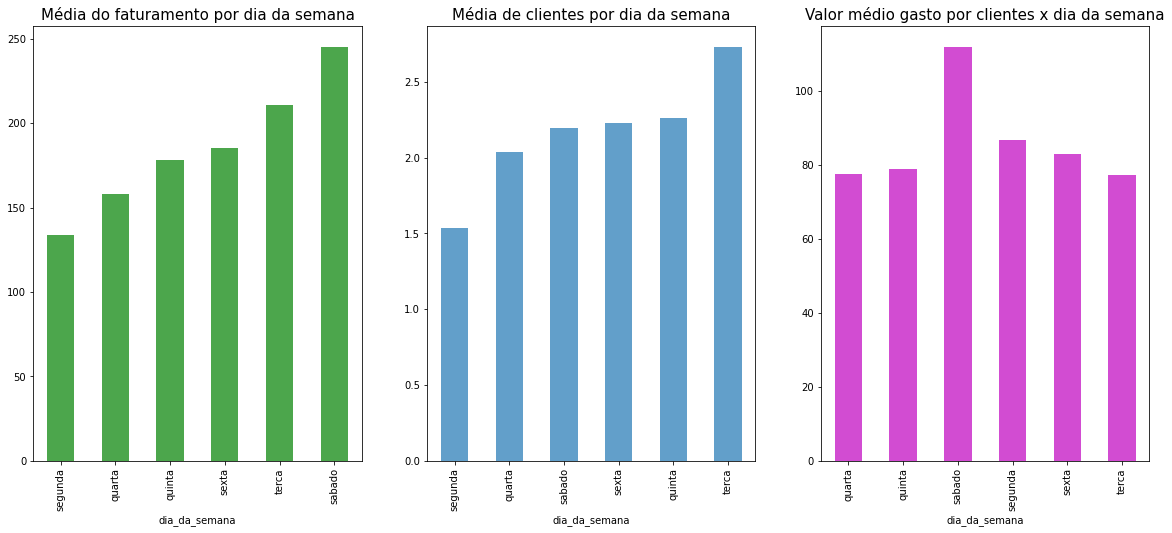

In [21]:
fig,ax= plt.subplots(1,3,figsize=(20,8))

# Observando a media do faturamento de acordo com dia da semana.

df[df['dia_da_semana']!='domingo'].groupby('dia_da_semana').mean()['faturamento'].sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.7,ax=ax[0])
ax[0].set_title('Média do faturamento por dia da semana', fontsize=15)

# Observando a média de clientes de acordo com dia da semana.

df[df['dia_da_semana']!='domingo'].groupby('dia_da_semana').mean()['qtde_clientes'].sort_values(ascending=True).plot(kind='bar',alpha=0.7,ax=ax[1])
ax[1].set_title('Média de clientes por dia da semana', fontsize=15)

(df[df['dia_da_semana']!='domingo'].groupby('dia_da_semana').mean()['faturamento']/df[df['dia_da_semana']!='domingo'].groupby('dia_da_semana').mean()['qtde_clientes']).plot(kind='bar',color='m',alpha=0.7,ax=ax[2])
ax[2].set_title('Valor médio gasto por clientes x dia da semana', fontsize=15)
plt.show()


 - Analisando os gráficos acima pode-se perceber segunda-feira é o dia com menor média de faturamento e também de clientes, mas com relação ao valor médio gasto por cliente fica em segundo lugar.
 - Analisando a média todos os dias tem ao menos um cliente.
 - Terça-feira é o dia com maior  média de clientes e com relação a média do faturamento fica em segundo lugar, com média de 200 reais.
 - Sábado é o dia que os clientes costuma gastar mais.

# Análise por mês.

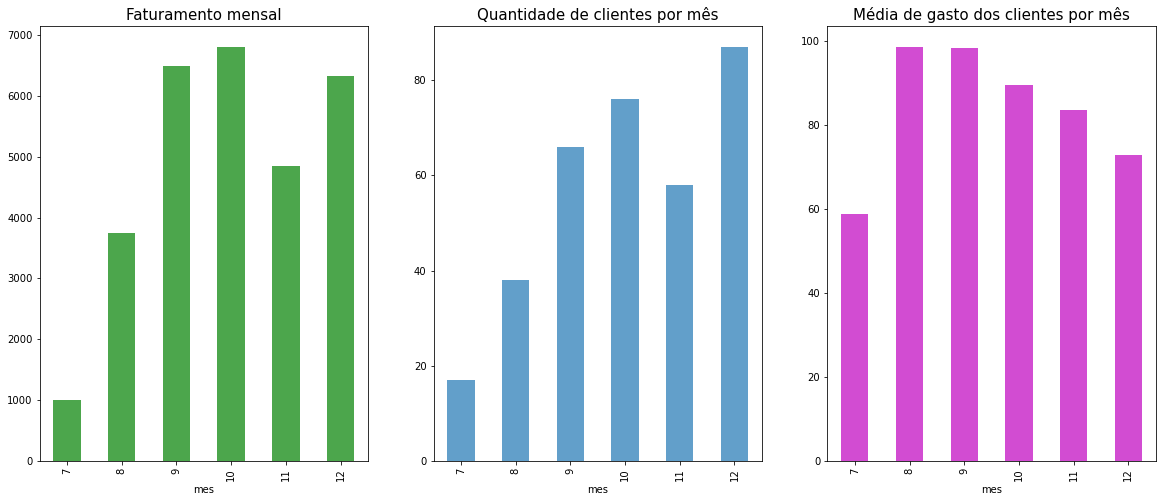

In [13]:
fig,ax = plt.subplots(1,3,figsize=(20,8))

df.groupby('mes').sum()['faturamento'].plot(kind='bar',ax=ax[0],color='g',alpha=0.7)
ax[0].set_title('Faturamento mensal',fontsize=15)

df.groupby('mes').sum()['qtde_clientes'].plot(kind='bar',ax=ax[1],alpha=0.7)
ax[1].set_title('Quantidade de clientes por mês',fontsize=15)

(df.groupby('mes').sum()['faturamento']/df.groupby('mes').sum()['qtde_clientes']).plot(kind='bar',color='m',alpha=0.7,ax=ax[2])
ax[2].set_title('Média de gasto dos clientes por mês',fontsize=15)

plt.show()

 - Analisando os gráficos acima pode-se perceber que após voltar ao funcionamento, o negócio teve um primeiro mês bem abaixo do faturamento médio, reagindo nos próximos meses.
 
 - O melhor mês com relação a faturamento foi o mês de outubro.
 
 - Com relação gasto por cada cliente, os meses que os clientes tiveram maior média de gasto foi em agosto e setembro.

# Analisando os meses que houve a maior média de  gasto por cliente

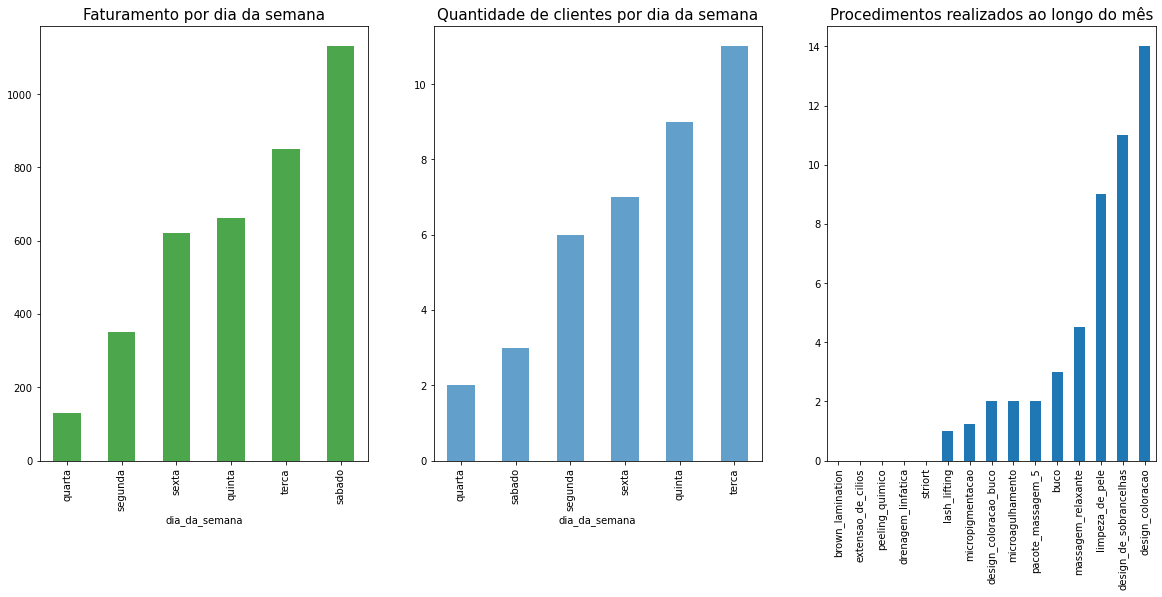

In [33]:
fig,ax= plt.subplots(1,3,figsize=(20,8))

# Observando a media do faturamento de acordo com dia da semana.

df[(df['dia_da_semana']!='domingo') & (df['mes']==8)].groupby('dia_da_semana').sum()['faturamento'].sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.7,ax=ax[0])
ax[0].set_title('Faturamento por dia da semana', fontsize=15)

# Observando a média de clientes de acordo com dia da semana.

df[(df['dia_da_semana']!='domingo') & (df['mes']==8)].groupby('dia_da_semana').sum()['qtde_clientes'].sort_values(ascending=True).plot(kind='bar',alpha=0.7,ax=ax[1])
ax[1].set_title('Quantidade de clientes por dia da semana', fontsize=15)



df[df['mes']==8].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',ax=ax[2])

ax[2].set_title('Procedimentos realizados ao longo do mês', fontsize=15)

plt.show()


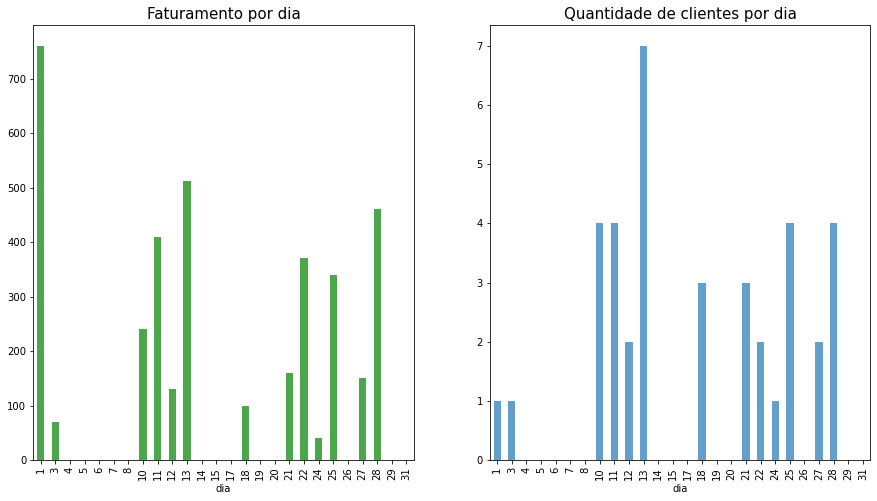

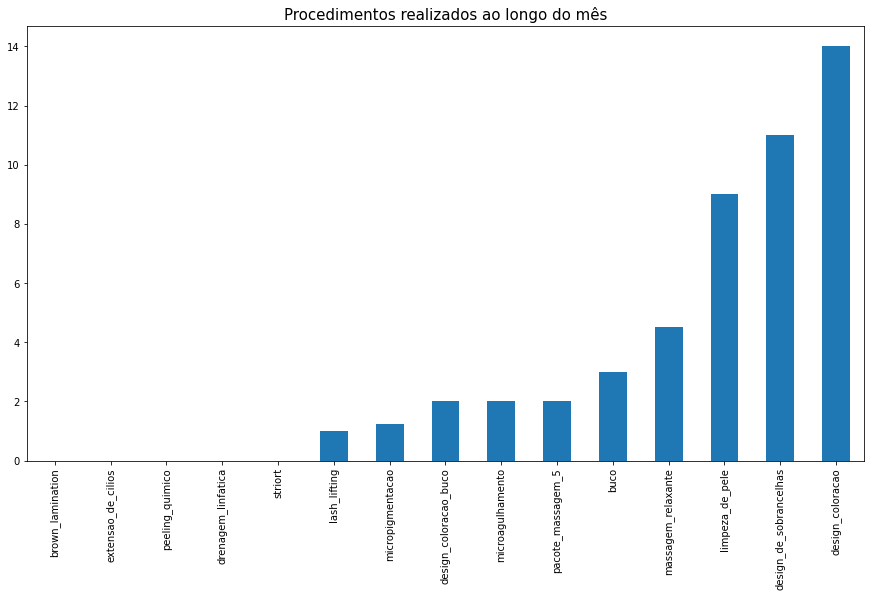

In [43]:
# Distribuição do faturamentoe da quantidade de clientes por dia



fig,ax= plt.subplots(1,2,figsize=(15,8))


df[(df['dia_da_semana']!='domingo') & (df['mes']==8)].groupby('dia').sum()['faturamento'].plot(kind='bar',color='g',alpha=0.7,ax=ax[0])
ax[0].set_title('Faturamento por dia', fontsize=15)


df[(df['dia_da_semana']!='domingo') & (df['mes']==8)].groupby('dia').sum()['qtde_clientes'].plot(kind='bar',alpha=0.7,ax=ax[1])
ax[1].set_title('Quantidade de clientes por dia', fontsize=15)

fig,ax= plt.subplots(1,1,figsize=(15,8))



df[df['mes']==8].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar')

plt.title('Procedimentos realizados ao longo do mês', fontsize=15)


plt.show()

# Analisando a distribuição dos procedimentos de acordo com mês e dia da semana.

In [ ]:
#  AGOSTO

fig,ax = plt.subplots(1,2,figsize=(12,6))
df[(df['dia_da_semana']=="segunda") & (df['mes']==8)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[0])
ax[0].set_title('SEGUNDA - MÊS 8')


df[(df['dia_da_semana']=="terca") & (df['mes']==8)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[1])
ax[1].set_title('TERÇA - MÊS 8')


fig,ax = plt.subplots(1,2,figsize=(12,6))
df[(df['dia_da_semana']=="quarta") & (df['mes']==8)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[0])
ax[0].set_title('QUARTA - MÊS 8')


df[(df['dia_da_semana']=="quinta") & (df['mes']==8)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[1])
ax[1].set_title('QUINTA - MÊS 8')


fig,ax = plt.subplots(1,2,figsize=(12,6))
df[(df['dia_da_semana']=="sexta") & (df['mes']==8)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[0])
ax[0].set_title('SEXTA - MÊS 8')


df[(df['dia_da_semana']=="sabado") & (df['mes']==8)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[1])
ax[1].set_title('SÁBADO - MÊS 8')

plt.show()

In [ ]:
# SETEMBRO

fig,ax = plt.subplots(1,2,figsize=(12,6))
df[(df['dia_da_semana']=="segunda") & (df['mes']==9)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[0])
ax[0].set_title('SEGUNDA - MÊS 9')


df[(df['dia_da_semana']=="terca") & (df['mes']==9)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[1])
ax[1].set_title('TERÇA - MÊS 9')


fig,ax = plt.subplots(1,2,figsize=(12,6))
df[(df['dia_da_semana']=="quarta") & (df['mes']==9)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[0])
ax[0].set_title('QUARTA - MÊS 9')


df[(df['dia_da_semana']=="quinta") & (df['mes']==9)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[1])
ax[1].set_title('QUINTA - MÊS 9')


fig,ax = plt.subplots(1,2,figsize=(12,6))
df[(df['dia_da_semana']=="sexta") & (df['mes']==9)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[0])
ax[0].set_title('SEXTA V')


df[(df['dia_da_semana']=="sabado") & (df['mes']==9)].drop(columns=['dia','ano','mes','dia_da_semana','faturamento','qtde_clientes']).sum().sort_values(ascending=True).plot(kind='bar',color='g',alpha=0.8,ax=ax[1])
ax[1].set_title('SÁBADO - MÊS 9')

plt.show()
